In [1]:
# 데이터 처리 함수
import pandas as pd
import numpy as np

# 데이터 시각화
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# 한글폰트
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
df1 = pd.read_csv('ex3.csv')

In [3]:
df1

,Passenger Class,Survived,Name,Sex,Age,Siblings and Spouses,Parents and Children,Ticket #,Fare,Cabin,Port,Lifeboat,Body,Home / Destination,Midpoint age
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",27.5
1,1,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",2.5
2,1,No,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.5
3,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",32.5
4,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,No,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,12.5
1305,3,No,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,No,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,27.5
1307,3,No,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,27.5


In [4]:
df1.drop(columns=['Name','Ticket #','Cabin','Port','Lifeboat','Body','Home / Destination','Midpoint age'])

,Passenger Class,Survived,Sex,Age,Siblings and Spouses,Parents and Children,Fare
0,1,Yes,female,29.0000,0,0,211.3375
1,1,Yes,male,0.9167,1,2,151.5500
2,1,No,female,2.0000,1,2,151.5500
3,1,No,male,30.0000,1,2,151.5500
4,1,No,female,25.0000,1,2,151.5500
...,...,...,...,...,...,...,...
1304,3,No,female,14.5000,1,0,14.4542
1305,3,No,female,NaN,1,0,14.4542
1306,3,No,male,26.5000,0,0,7.2250
1307,3,No,male,27.0000,0,0,7.2250


In [5]:
df2 = df1.drop(columns=['Name','Ticket #','Cabin','Port','Lifeboat','Body','Home / Destination','Midpoint age'])

In [6]:
df2['Survived'] = df2['Survived'].replace({'Yes':1, 'No':0})

In [7]:
df2['Sex'] = df2['Sex'].replace({'male':1, 'female':0})

In [8]:
df2

,Passenger Class,Survived,Sex,Age,Siblings and Spouses,Parents and Children,Fare
0,1,1,0,29.0000,0,0,211.3375
1,1,1,1,0.9167,1,2,151.5500
2,1,0,0,2.0000,1,2,151.5500
3,1,0,1,30.0000,1,2,151.5500
4,1,0,0,25.0000,1,2,151.5500
...,...,...,...,...,...,...,...
1304,3,0,0,14.5000,1,0,14.4542
1305,3,0,0,NaN,1,0,14.4542
1306,3,0,1,26.5000,0,0,7.2250
1307,3,0,1,27.0000,0,0,7.2250


In [9]:
df2.isnull().sum()

Passenger Class           0
Survived                  0
Sex                       0
Age                     263
Siblings and Spouses      0
Parents and Children      0
Fare                      1
dtype: int64

In [10]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].median())

In [11]:
df2

,Passenger Class,Survived,Sex,Age,Siblings and Spouses,Parents and Children,Fare
0,1,1,0,29.0000,0,0,211.3375
1,1,1,1,0.9167,1,2,151.5500
2,1,0,0,2.0000,1,2,151.5500
3,1,0,1,30.0000,1,2,151.5500
4,1,0,0,25.0000,1,2,151.5500
...,...,...,...,...,...,...,...
1304,3,0,0,14.5000,1,0,14.4542
1305,3,0,0,28.0000,1,0,14.4542
1306,3,0,1,26.5000,0,0,7.2250
1307,3,0,1,27.0000,0,0,7.2250


In [12]:
df2.to_csv('preprocessing_Data.csv')

In [14]:
df3 = pd.DataFrame(df1) # 원본 데이터프레임
df2_pre = pd.DataFrame(df2) # 전처리한 데이터프레임

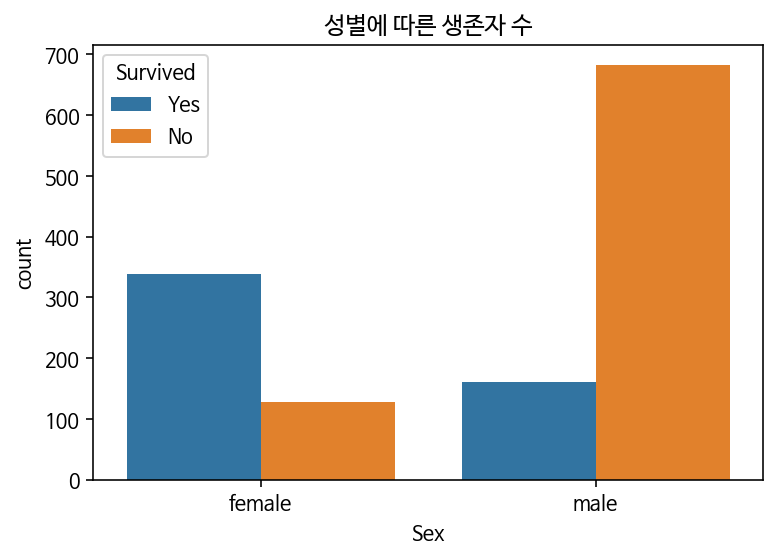

In [15]:
sns.countplot(x='Sex',data=df3, hue='Survived') # 0, 1로 미리 바꿔놓으니까 표를 볼 때 보기가 힘듦; 그래서 표를 볼 때는 원래 데이터 원본으로?
plt.title("성별에 따른 생존자 수")
plt.show()



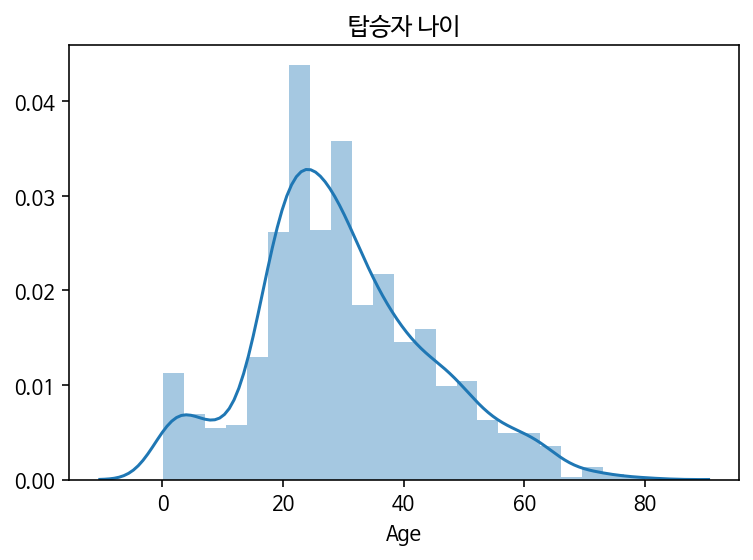

In [18]:
sns.distplot(df3['Age'])
plt.title("탑승자 나이")
plt.show()

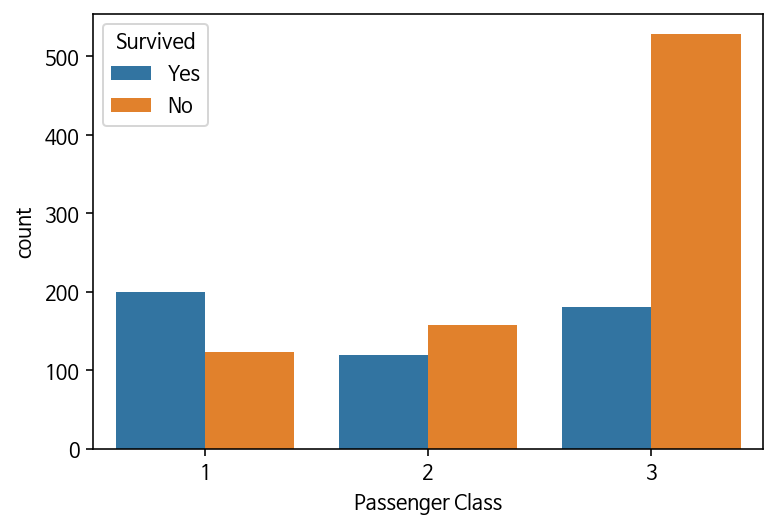

In [20]:
sns.countplot(data=df3, x='Passenger Class', hue='Survived')

In [21]:
# 여러 알고리즘을 가져와서 가장 성능이 좋은 모델을 사용함.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [22]:
X = df2_pre.drop(columns='Survived')

In [23]:
Y = df2_pre['Survived']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1047, 6)
(262, 6)
(1047,)
(262,)


In [34]:
model_pip_DT = Pipeline([ ('scaler', MinMaxScaler()),
          ('model_DT', DecisionTreeClassifier())])

In [35]:
model_pip_DT.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model_DT',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [57]:
param_list = {'model_DT__criterion':['gini', 'entropy'],
              'model_DT__max_depth':[3,4,5,6,7],
              'model_DT__min_samples_leaf':[3,4,5,6,7]} # decisionTree에 해당하는 하이퍼파라미터를 딕셔너리에 넣어줌.

In [58]:
model_grid = GridSearchCV(model_pip_DT, param_grid=param_list, 
             cv=5, n_jobs= -1, scoring='f1') # 검증을 끝마친 모델을 새로운 변수로 선언

In [59]:
model_grid

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model_DT',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
            

In [60]:
model_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model_DT',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
            

In [62]:
best_model = model_grid.best_estimator_

In [63]:
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

In [65]:
print('훈련 데이터 정확도 :',accuracy_score(Y_train, Y_pred_train))
print('테스트 데이터 정확도 :',accuracy_score(Y_test, Y_pred_test))

훈련 데이터 정확도 : 0.8137535816618912
테스트 데이터 정확도 : 0.8358778625954199
